Notebook to quickly illustrate the use of GeoPandas and its underlying package Shapely  
Here we create a polygon (actually a rectangle in this case), download from GIS shapefile all line
segment that intersect that polygon and then get the portion of each segment that is inside the box.

In [1]:
# Standard imports
import matplotlib.pyplot as plt
from matplotlib import patches
from pathlib import Path

%matplotlib inline

In [2]:
# imports from the packages
import geopandas
from shapely.geometry import Polygon

In [3]:
# define the polygon
llx, lly = -123.42134135200332, 48.185361624856405 
urx, ury = -123.40631079302298, 48.200392183836755
polygon = Polygon([(llx, lly), (urx, lly), (urx, ury), (llx, ury), (llx, lly)])

In [4]:
# read only the segments that intersect the polygon from the shapefile
shapefile_dir = Path('/Users/sallen/Documents/MIDOSS/shapefiles/')
# This file can be found at /data/MIDOSS/shapefiles on the ocean cluster
vessel_type = 'cargo'
month = '01'
innerdata = geopandas.read_file(shapefile_dir / 
                        f"{vessel_type}_2018_{month}" /
                        f"{vessel_type}_2018_{month}.shp", bbox=polygon)

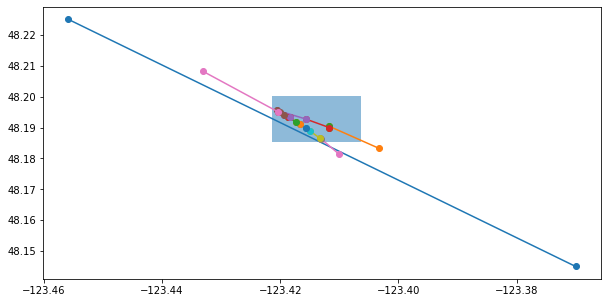

In [5]:
# plot a subset of what we got (plot is not "square")
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for index in range(58, 75):
    ax.plot([innerdata.geometry[index].coords[0][0],
              innerdata.geometry[index].coords[1][0]],
             [innerdata.geometry[index].coords[0][1],
              innerdata.geometry[index].coords[1][1]], 'o-')
patch = patches.Rectangle((llx, lly), urx-llx,  ury-lly, alpha=0.5, axes=ax,
                         facecolor='tab:blue', fill=True)
ax.add_patch(patch);

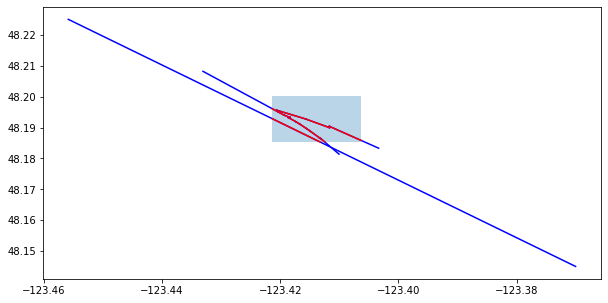

In [6]:
# select the segments inside the square.  Highlighted lines are selection.  Everything else is plotting.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
patch = patches.Rectangle((llx, lly), urx-llx,  ury-lly, alpha=0.3, axes=ax,
                         facecolor='tab:blue', fill=True)
ax.add_patch(patch);
for index in range(58, 75):
    
#####################################################################    
    segment = innerdata.geometry[index]
    inside = segment.intersection(polygon)
#####################################################################

    ax.plot([innerdata.geometry[index].coords[0][0],
              innerdata.geometry[index].coords[1][0]],
             [innerdata.geometry[index].coords[0][1],
              innerdata.geometry[index].coords[1][1]], 'b-')
    ax.plot([inside.coords[0][0], inside.coords[1][0]],
             [inside.coords[0][1], inside.coords[1][1]], 'r-')